In [1]:
import pandas as pd
import numpy as np
data= pd.read_csv('Train.csv',index_col='Loan_ID')

In [2]:
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [3]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
def missing(x):
    return sum(x.isnull())

In [5]:
print("Printing Columns missing values")
data.apply(missing,axis=0)

Printing Columns missing values


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
import statistics as s
s.mode(data['Gender'])

'Male'

In [7]:
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"])
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556


In [8]:
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [9]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
df = pd.read_csv("TrainIII.csv") #Reading the dataset in a dataframe using Pandas

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [13]:
df['ApplicantIncome'].hist(bins=50)

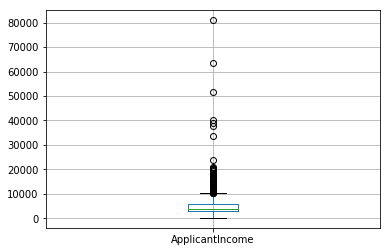

In [14]:
import matplotlib as plt
df.boxplot(column='ApplicantIncome')


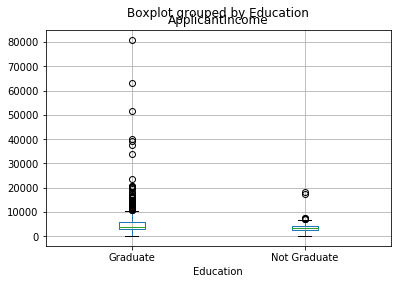

In [15]:
df.boxplot(column='ApplicantIncome',by='Education')

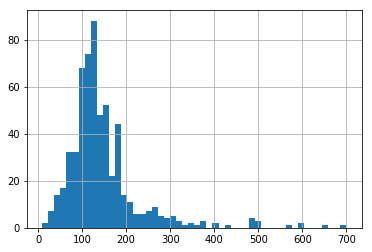

In [16]:
df['LoanAmount'].hist(bins=50)

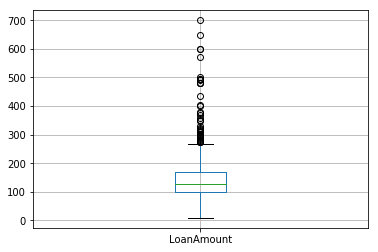

In [17]:
df.boxplot(column='LoanAmount')

In [18]:
temp1=df['Credit_History'].value_counts(ascending=True)

temp2= df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print('Frequency table for Credit History')
print(temp1)
print('Probability of getting loan for each credit history class')
print(temp2)

print(type(temp1))
print(type(temp2))

Frequency table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting loan for each credit history class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


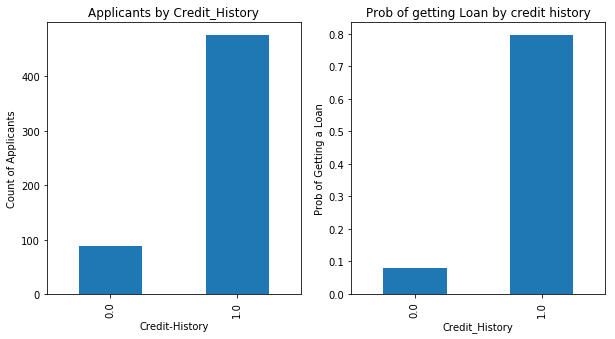

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].set_xlabel('Credit-History') 
axes[0].set_ylabel('Count of Applicants') 
axes[0].set_title("Applicants by Credit_History") 
temp1.plot(ax=axes[0],kind='bar')

axes[1].set_xlabel('Credit-History') 
axes[1].set_ylabel('Prob of Getting a Loan')
axes[1].set_title('Prob of getting Loan by credit history')
temp2.plot(ax=axes[1],kind='bar')
axes[1].get_legend().remove()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


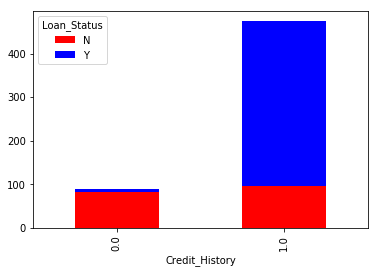

In [20]:
temp3 = pd.crosstab(df['Credit_History'],df['Loan_Status'])
print(temp3)
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307


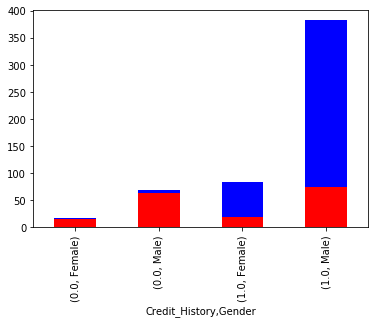

In [21]:
temp4 = pd.pivot_table(df,index=['Credit_History','Gender'],columns=['Loan_Status'],aggfunc='size')
print(temp4)
ax=temp4.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
ax.get_legend().remove()

In [22]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

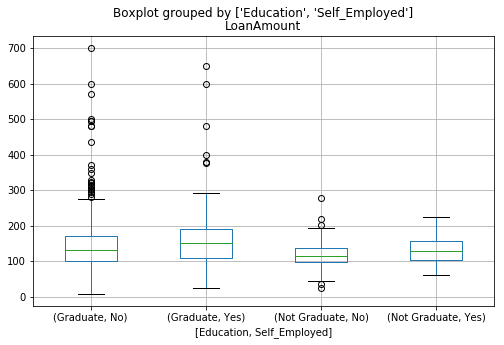

In [24]:
df.boxplot(column='LoanAmount',by=['Education','Self_Employed'], figsize=(8,5))

In [25]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [26]:
df['Self_Employed'].fillna('No',inplace=True)

In [27]:
table = df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                131.0         115.0
Yes               152.0         130.0


In [28]:
def fage(x):
    return table.loc[x['Self_Empolyed'],x['Education']]

In [29]:
df[df['LoanAmount'].isnull()] = df[df['LoanAmount'].isnull()].apply(fage,axis=1)

In [30]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

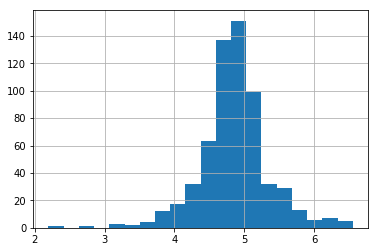

In [31]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

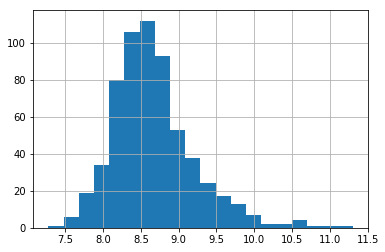

In [32]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome']=np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
df_train =  df
df_test =  pd.read_csv('test.csv')

In [35]:
df_train.shape

(614, 15)

In [36]:
df_test.shape

(367, 12)

In [37]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515


In [38]:
#Printing the frequency of missing values
def empty(x):
    return sum(x.isnull())
df_train.apply(empty,axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
dtype: int64

In [39]:
import statistics as s
df_train['Gender'] =  df_train['Gender'].fillna(s.mode(df_train['Gender']))

In [40]:
df_train.apply(empty,axis=0)

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
dtype: int64

In [118]:
# Still there are many empty values
#So treating all the empty values
df_train['Married'] =  df_train['Married'].fillna(s.mode(df_train['Married']))
df_train['Dependents'] =  df_train['Dependents'].fillna(s.mode(df_train['Dependents']))
df_train['Loan_Amount_Term'] =  df_train['Loan_Amount_Term'].fillna(s.mode(df_train['Loan_Amount_Term']))
df_train['Credit_History'] =  df_train['Credit_History'].fillna(s.mode(df_train['Credit_History']))

In [119]:
df_train.apply(empty,axis=0)

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
Dependents           0
dtype: int64

# Exploratory Data Analysis: We want to show the power of visualizations

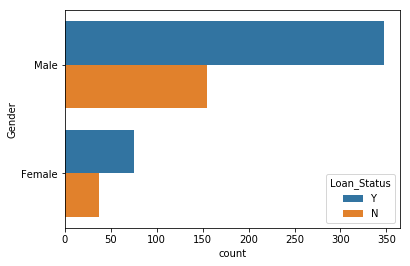

In [43]:
sns.countplot(y='Gender', hue='Loan_Status', data=df_train)

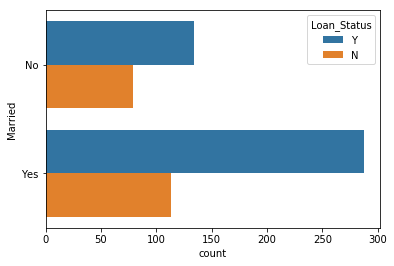

In [45]:
sns.countplot(y='Married',hue='Loan_Status',data=df_train)

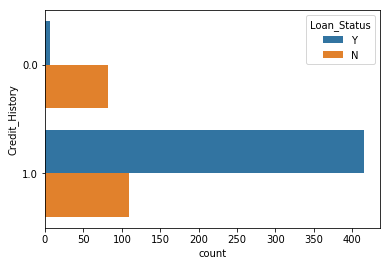

In [46]:
sns.countplot(y='Credit_History',hue='Loan_Status',data=df_train)

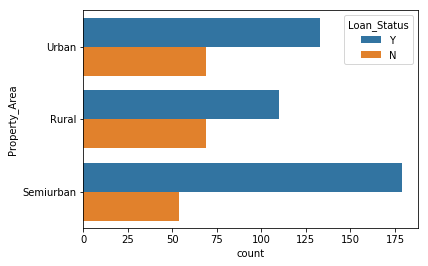

In [47]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=df_train)

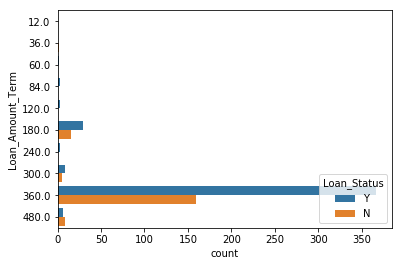

In [48]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df_train)

C:\Users\visha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


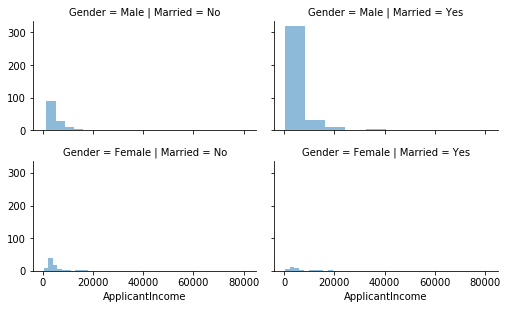

In [52]:
grid= sns.FacetGrid(df_train,row='Gender',col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

C:\Users\visha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


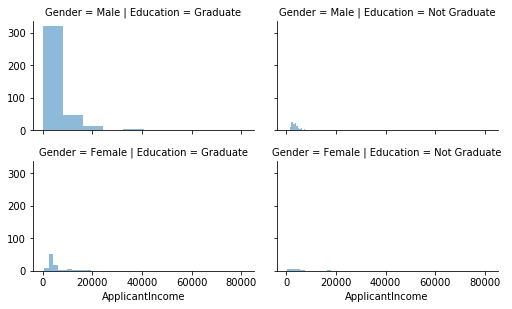

In [54]:
grid=sns.FacetGrid(df_train,row='Gender',col='Education',size=2.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

C:\Users\visha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


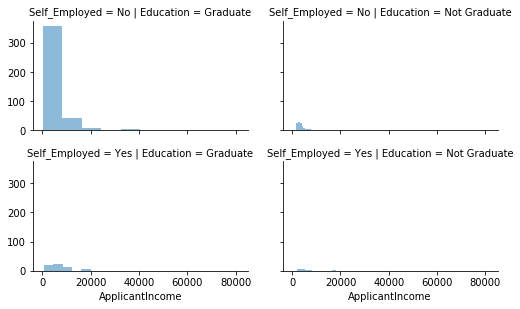

In [57]:
grid = sns.FacetGrid(df_train,row='Self_Employed',col='Education',size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5,bins=10)
grid.add_legend()

C:\Users\visha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


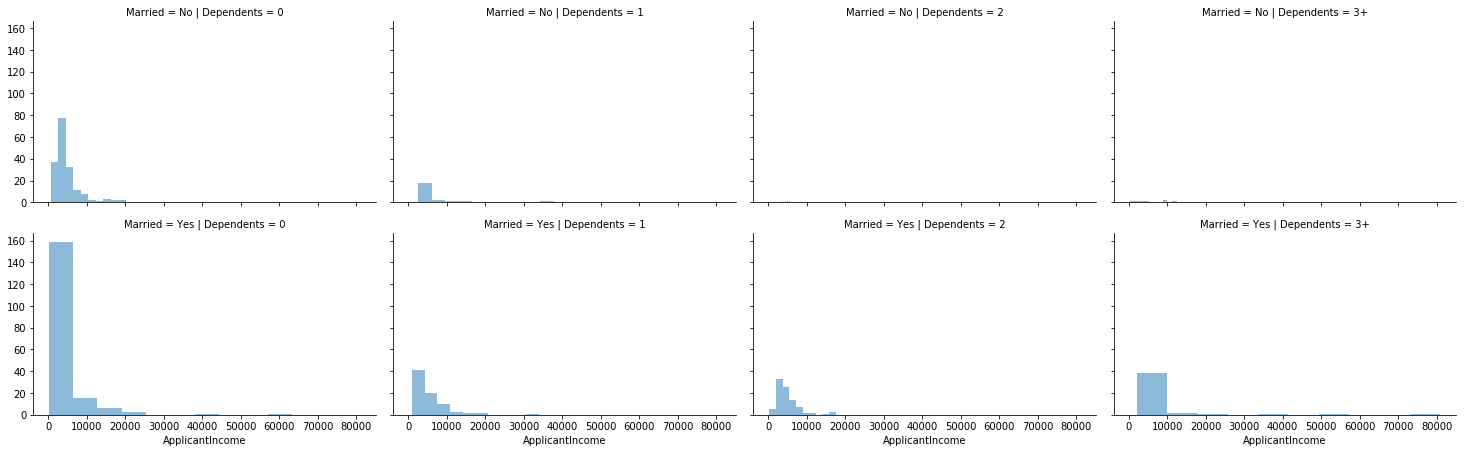

In [59]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

# Encoding Numeric data, getting ready for Training

In [120]:
code = {'Male':1,'Female':2,
       'Yes':1,'No':2,
       'Graduate':1,'Not Graduate':2,
       'Urban':3,'Semiurban':2,'Rural':1,
       'Y':1,'N':0,
       '3+':3}


In [133]:
df_train = df_train.applymap(lambda s: code.get(s) if s in code else s)
df_test = df_test.applymap(lambda s: code.get(s) if s in code else s)

#drop the uniqes loan id
df_train.drop('Loan_ID',axis=1,inplace=True)

In [65]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,1,2,0,1,2,5849,0.0,146.412162,360.0,1.0,3,1,4.986426,8.674026
1,1,1,1,1,2,4583,1508.0,128.000000,360.0,1.0,1,0,4.852030,8.714568
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,3,1,4.189655,8.006368
3,1,1,0,2,2,2583,2358.0,120.000000,360.0,1.0,3,1,4.787492,8.505323
4,1,2,0,1,2,6000,0.0,141.000000,360.0,1.0,3,1,4.948760,8.699515


In [66]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [123]:
df_train.apply(empty,axis=0)

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
Dependents           0
dtype: int64

### We have to cpnvert the Dependents feature to Numeric

In [124]:
Dependents1 = pd.to_numeric(df_train.Dependents)
Dependents2 = pd.to_numeric(df_test.Dependents)

In [125]:
df_train.drop(['Dependents'],axis=1, inplace=True)
df_test.drop(['Dependents'],axis=1, inplace=True)

In [126]:
df_train =  pd.concat([df_train,Dependents1],axis=1)
df_test =  pd.concat([df_test,Dependents2],axis=1)

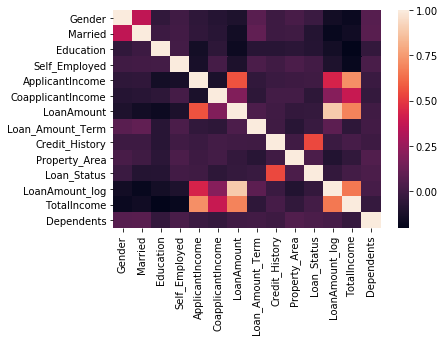

In [127]:
sns.heatmap(df_train.corr())

In [128]:
y=df_train['Loan_Status']
X=df_train.drop(['Loan_Status'],axis=1)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

## using Logistic Regression

In [134]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
ypred=model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [139]:
evaluation = f1_score(y_test,ypred)
evaluation

0.8979591836734695

# Using Decision tree

In [140]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
ypred_tree = tree.predict(X_test)
accuracy = f1_score(y_test,ypred_tree)
print(accuracy)

0.8023255813953488


# Using Random Forest Classfier

In [144]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [147]:
ypred_forest = forest.predict(X_test)

In [148]:
accuracy = f1_score(ypred_forest,ypred)
print(accuracy)

0.8181818181818182
